In [2]:
from beef import fe
import numpy as np
import vispy
vispy.use("jupyter_rfb") 	# if Jupyter Labs, use 'jupyter_rfb'

First, the `fe.Section` class is used to construct a Section object describing the properties of the beam:

In [40]:
sections = [fe.Section(E=100, A=100, I_y=1.0, I_z=1.0, J=1e-3, poisson=0.3)] 	# list of Section objects

Thereafter, the beam is discretized into 20 elements and is given a length of 10 m. A node matrix and an element matrix is constructed (typical input to commercial FE software), to construct the part. The beam is constrained in all degrees of freedom in node 1, by creating and inputting a list of a single `fe.Constraint` object.

RFBOutputContext()


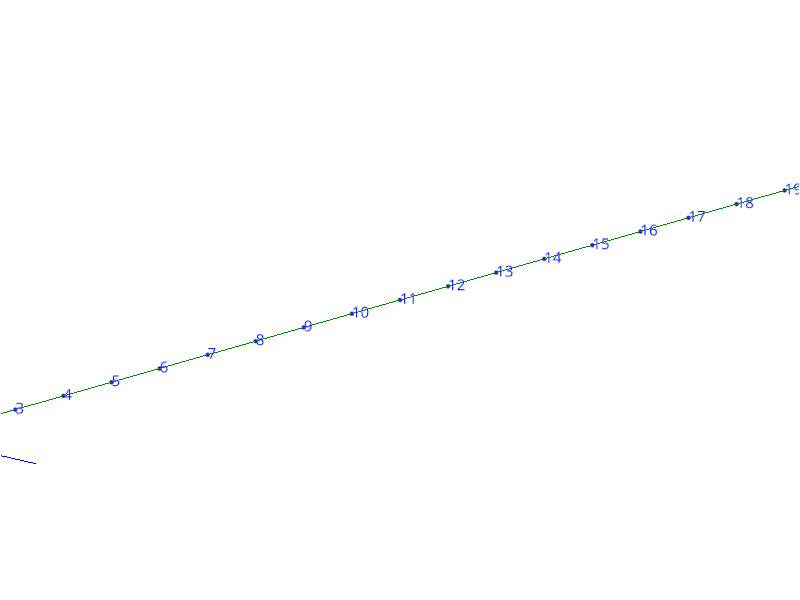

CanvasBackend(css_height='600px', css_width='800px')

In [41]:
# Define mesh
els = 20
L = 10
node_labels = np.arange(1, els+2)
x = (node_labels - 1)/els*L
node_matrix = np.vstack([node_labels.T, x.T, x.T*0, x.T*0]).T 	# rows: label, x, y, z 
element_matrix = np.vstack([np.arange(1,els+1), node_labels[0:-1], node_labels[1:]]).T # rows: label, n1, n2

# Define constraints
constraints = [fe.Constraint([1], dofs='all', node_type='beam3d')] 	# list of Constraint objects

# Define part and plot part
part = fe.Part(node_matrix, element_matrix, sections=sections, constraints=constraints)   # Part(ElDef) object
scene, __ = part.plot(plot_nodes=True, node_labels=True)

scene

Furthermore, a moment $M=2\pi E I/L$ (analytical moment needed for beam to bite its tail) is applied along degree-of-freedom index 2 at the rightmost node (last label in `node_labels`):

In [42]:
# Define force
M = [2*np.pi*sections[0].E*sections[0].I[0]/L]	# analytical moment needed for beam to bite its tail
dof_ix = 4	# i.e., bending moment
force_nodelabels = [node_labels[-1]]	# apply force on last node (rightmost)
forces = [fe.Force(force_nodelabels, dof_ix, M, t=1)] 	# list of Force objects

Finally, the analysis object is initiated by the `Part` object, the list of `Force` objects, and parameters `dt` (time step) and `tol` (dictionary describing tolerance criteria for displacements, 'u' and residual forces, 'r'). The analysis is furthermore run by invoking `analysis.run_static()`:

In [43]:
# Define and run analysis
dt = 1 	# time step
tol = dict(r=0.01) 	#tolerances, specified residual max. 0.1
analysis = fe.Analysis(part, forces=forces, dt=dt, tol=tol)  # Analysis object, tmax not specified => tmax=1.0
analysis.run_static() # run static analysis

Static analysis:   0%|          | 0/2 [00:00<?, ?it/s]

>> Not converged after 10 iterations on increment 2. Response from iteration 10 saved. 



The resulting deformation is plotted as follows:

RFBOutputContext()


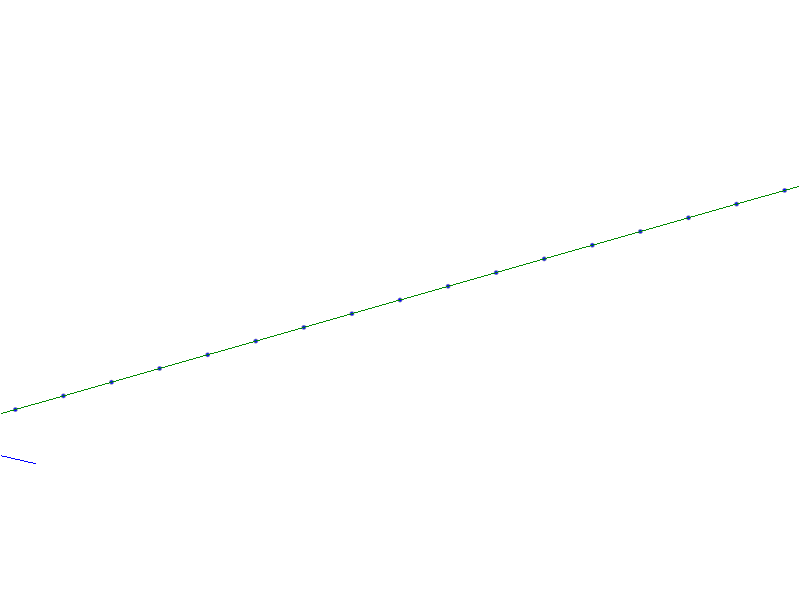

CanvasBackend(css_height='600px', css_width='800px')

In [44]:
scene, __ = analysis.eldef.plot(node_labels=False, element_labels=False, plot_nodes=True, overlay_deformed=True)
scene